# Machine Failure Classification 📠

In this project, we will try to build a efficent classifier that can classify machines that are most likely to face a failure, we will explore different classification algotithms and we will devide this project to the following steps :

1. Problem Definition
2. Evaluation Metric
3. Data
4. Features
5. EDA
6. Modelling
7. Hyperparameter tuning
8. Predictions
9. Saving the model













## 1. Problem definition

The goal of this project is to build an efficient classifier to predict machines that are prone to face a failure based on their features, this can help the company better maintain their machines and be prepared for upcoming machine failures.

## 2. Evaluation metrics

Submissions for kaggle are evaluated on area under the ROC curve (AUC score) between the predicted probability and the observed target, but we will use other metrics as well for better evaluation.

## 3. Data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Machine Failure Predictions. Feature distributions are close to, but not exactly the same, as the original. We can (and we will) use the original dataset as part of this project, both to explore differences as well as to see whether incorporating the original in training improves model performance.


## 4. Features

**Target column** :
<code> Machine failure </code> is the (binary) target (which, in order to align with the ordering of the original dataset, is not in the last column position)

## 5. EDA

**Note** : Since we have two versions of the data, the synthetic and the real, we will divide each section into two subsections, one for the synthetic data and the other for real data.

### 5.1. Synthetic Data

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#getting the synthetic training data
syn_data=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/Synthetic Data/train.csv")
syn_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
#basic info about the data
syn_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> We can notice that there are no missing values.

In [ ]:
#Exploring the target variable
syn_data["Machine failure"].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

<Axes: >

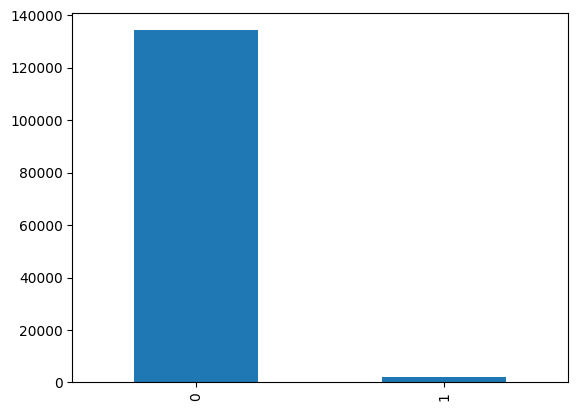

In [ ]:
#plotting the distributions of the target
syn_data["Machine failure"].value_counts().plot(kind="bar")

> Heavily imbalanced data, this is where the choice of AUC score as the evaluation metric comes in handy since the AUC doesn't get influened by the distribution of the target column. We will use other metrics such as Precision and Recall too.

In [ ]:
#Correlation matrix
def plot_corr_matrix(df) :
    fig,ax=plt.subplots(figsize=(15,10));
    ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt='.2f');
    ax.set(title="Correlation Matrix");

<ipython-input-6-d4d12a0c97f9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt='.2f');


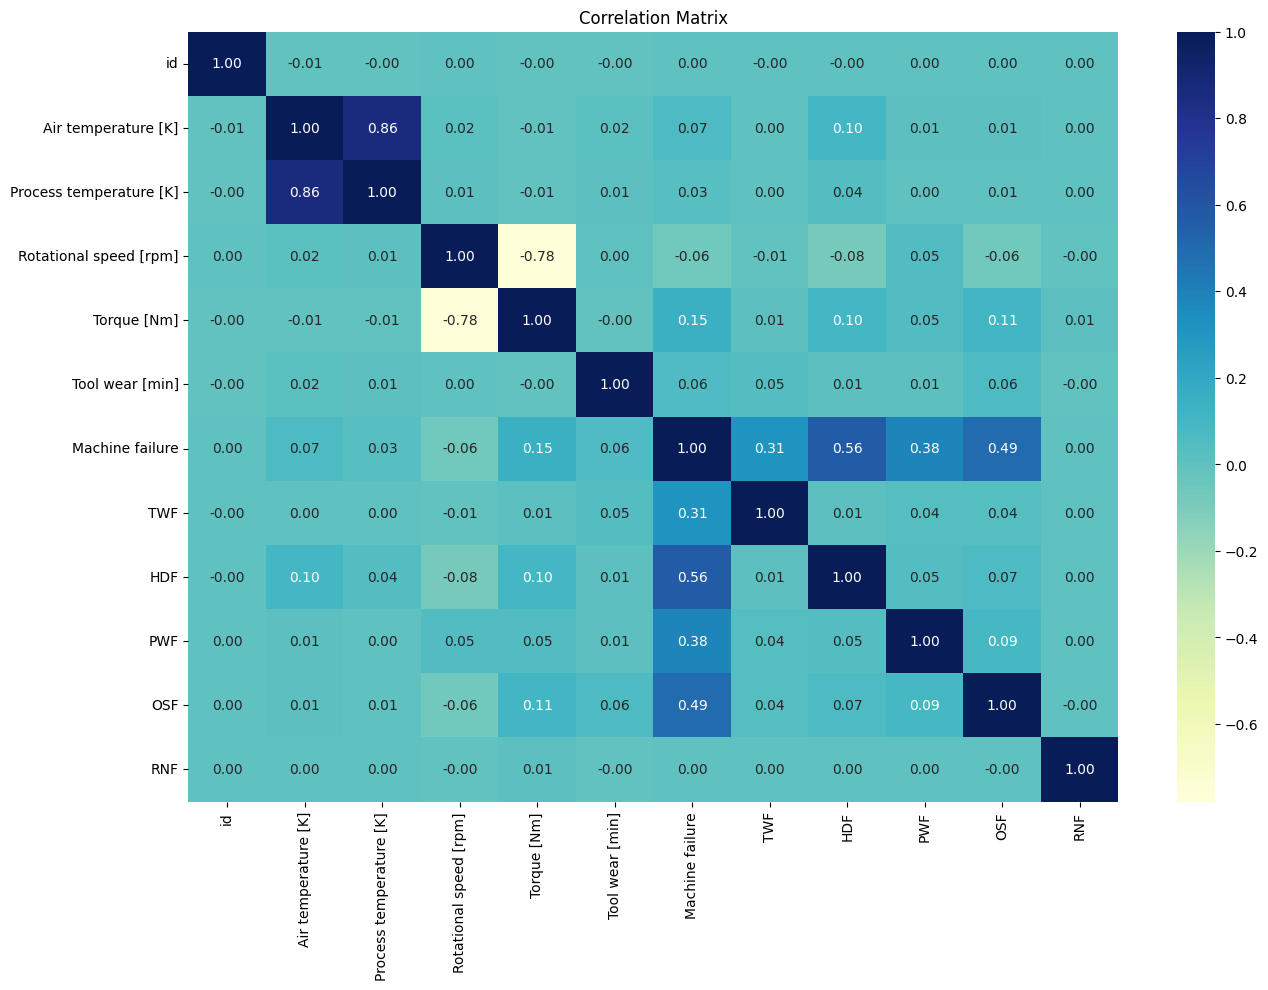

In [ ]:
plot_corr_matrix(syn_data)

> The variables most correlated to the target column are : Torque, TWF,
HDF,OSF and RNF

In [ ]:
#encoding the categorical variable
def encoding_cat_variables(df,variable) :
    encoded_type=pd.get_dummies(df[variable])
    df=pd.concat([df,encoded_type],axis=1)
    return df

In [ ]:
syn_data=encoding_cat_variables(syn_data,"Type")
syn_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [ ]:
#dropping the columns we don't need
def drop_columns(df,columns) :
    df.drop(columns,axis=1,inplace=True)
    return df

In [ ]:
syn_data=drop_columns(syn_data,["id","Product ID","Type"])
syn_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


> Now that our synthetic data is all numerical, it is ready for modelling.

### 5.2. Real Data

In [ ]:
#getting the real data
rl_data=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/Real Data/machine failure.csv")
rl_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
#basic infos
rl_data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


> No missing values

<Axes: >

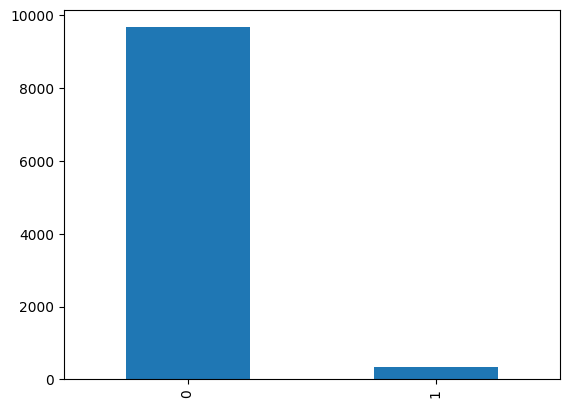

In [ ]:
#exploring the target variable
rl_data["Machine failure"].value_counts().plot(kind="bar")

> Imbalanced data in the real dataset too

<ipython-input-6-d4d12a0c97f9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt='.2f');


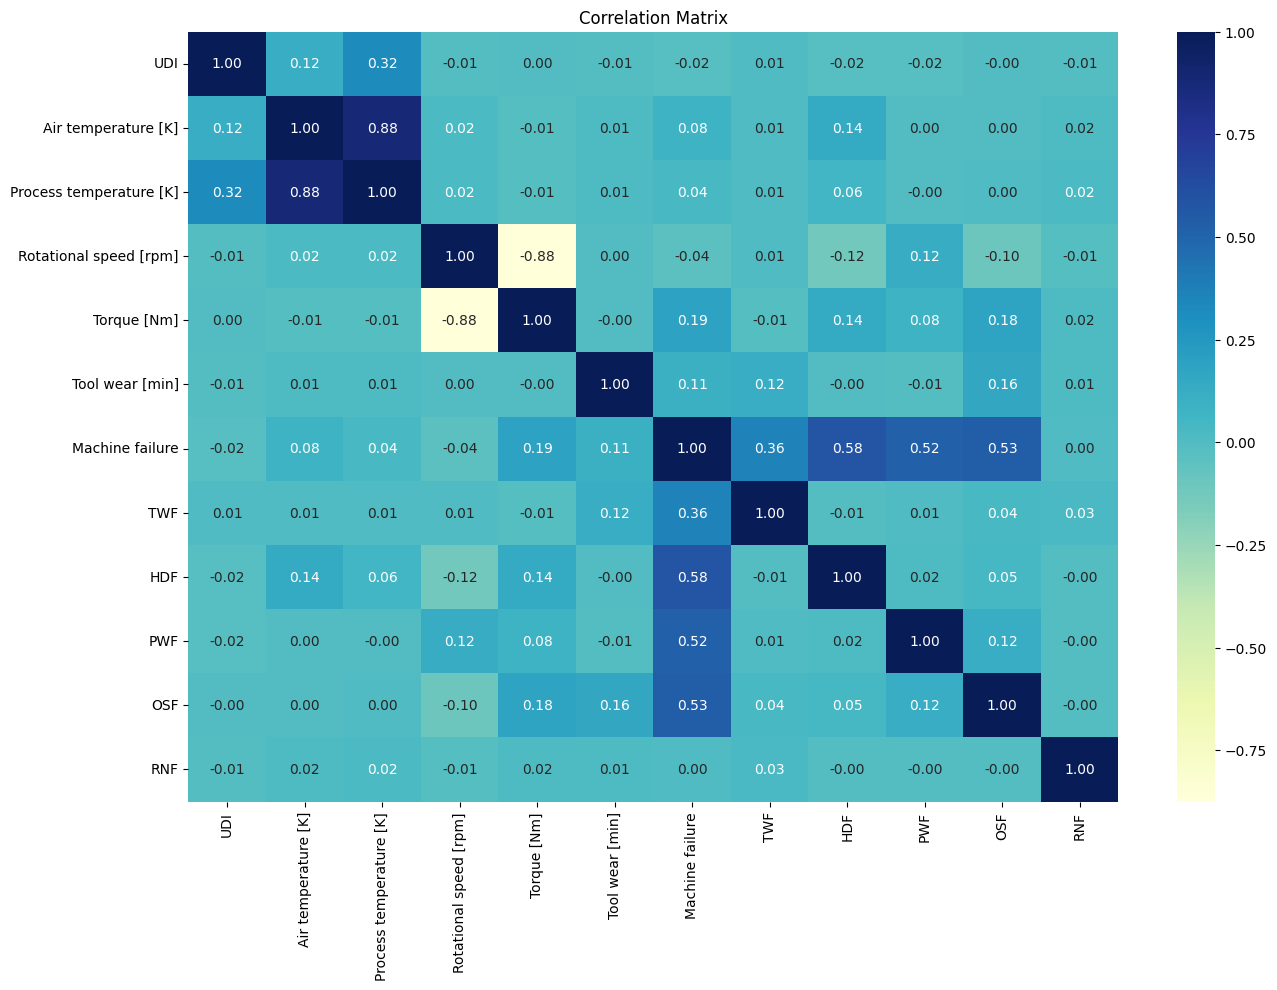

In [ ]:
#correlation matrix
plot_corr_matrix(rl_data);

> The variables most correlated to the target column are : Torque, TWF,
HDF,OSF and RNF

In [ ]:
#encoding the cat labels
rl_data=encoding_cat_variables(rl_data,"Type")
rl_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [ ]:
#dropping the unnecessary columns
rl_data=drop_columns(rl_data,["UDI","Product ID","Type"])
rl_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


> Now that both the real data and the synthetic are in numerical format, we are ready for modelling

#Round 1 : Traditional classifiers

##6. Modelling

### 6.1. Modelling using synthetic data

In [ ]:
#splitting the data into X and y
X_syn=syn_data.drop("Machine failure",axis=1)
y_syn=syn_data["Machine failure"]

In [ ]:
X_syn.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,1


In [ ]:
y_syn.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [ ]:
#scaling the X data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_syn=pd.DataFrame(scaler.fit(X_syn).transform(X_syn),columns=X_syn.columns)
X_syn.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.582418,0.4750,0.243402,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.802198,0.7875,0.339003,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.439560,0.3375,0.365982,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.626374,0.6375,0.201173,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.296703,0.4000,0.269795,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#splitting the data into training and validation sets
from sklearn.model_selection import train_test_split
np.random.seed(34)
X_syn_train,X_syn_valid,y_syn_train,y_syn_valid=train_test_split(X_syn,y_syn,test_size=0.2)

> Now that the data is split and scaled, we are ready to model.

In [ ]:
#importing the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#instanciating the basline models
rf_clf=RandomForestClassifier()
log_clf=LogisticRegression()
knn_clf=KNeighborsClassifier()

In [ ]:
#function to fit the models
def fit_models(models,X,y) :
  for model in models :
    model.fit(X,y)

In [ ]:
fit_models([rf_clf,log_clf,knn_clf],X_syn_train,y_syn_train)

In [ ]:
#function to evaluate the models
from sklearn.metrics import precision_score,recall_score,roc_auc_score
def evaluate_models(models,X,y,auc=True) :
  models_metrics={}
  for model_name, model in models.items() :
    models_metrics[model_name]={"Precision" : precision_score(y,model.predict(X)),
                               "Recall" : recall_score(y,model.predict(X))}
    if auc :
      models_metrics[model_name]["Auc"]=roc_auc_score(y,model.predict(X))
  return models_metrics

In [ ]:
models={"RF" : rf_clf,
        "Log Regressor" : log_clf,
        "KNN" : knn_clf}
metrics=evaluate_models(models,X_syn_valid,y_syn_valid)
metrics

{'RF': {'Precision': 0.9746835443037974,
  'Recall': 0.7549019607843137,
  'Auc': 0.8773021597953863},
 'Log Regressor': {'Precision': 0.9900990099009901,
  'Recall': 0.7352941176470589,
  'Auc': 0.8675912510997404},
 'KNN': {'Precision': 0.9836601307189542,
  'Recall': 0.7377450980392157,
  'Auc': 0.8687795361466262}}

<Axes: >

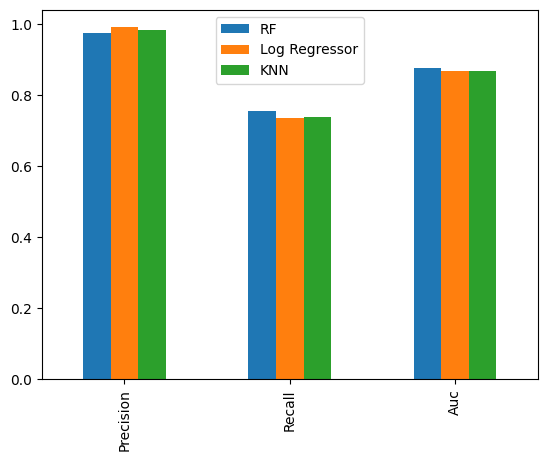

In [ ]:
#plotting the results
pd.DataFrame(metrics).plot(kind="bar")

> As we can see, the basline models' performance on the validation data is relatively close, so we will try to enhance their performance further

### 6.2. Modelling with real data

In [ ]:
#splitting the data into X and y
X_rl=rl_data.drop("Machine failure",axis=1)
y_rl=rl_data["Machine failure"]

In [ ]:
X_rl.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0


In [ ]:
y_rl.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [ ]:
#scaling the X data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_rl=pd.DataFrame(scaler.fit(X_rl).transform(X_rl),columns=X_rl.columns)
X_rl.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#splitting the data into training and validation
X_rl_train,X_rl_valid,y_rl_train,y_rl_valid=train_test_split(X_rl,y_rl,test_size=0.2)

> The data now is ready for modelling.

In [ ]:
#instanciating the models
rf_rl_clf=RandomForestClassifier()
log_rl_clf=LogisticRegression()
knn_rl_clf=KNeighborsClassifier()

In [ ]:
#fit the models
fit_models([rf_rl_clf,log_rl_clf,knn_rl_clf],X_rl_train,y_rl_train)

In [ ]:
#evaluating the models
rl_models={"Random Forest" :rf_rl_clf,
           "Log Regressor" :log_rl_clf,
           "KNN " :knn_rl_clf}
rl_metrics=evaluate_models(rl_models,X_rl_valid,y_rl_valid)
rl_metrics

{'Random Forest': {'Precision': 1.0, 'Recall': 0.95, 'AUC': 0.975},
 'Log Regressor': {'Precision': 1.0, 'Recall': 0.95, 'AUC': 0.975},
 'KNN ': {'Precision': 1.0,
  'Recall': 0.9166666666666666,
  'AUC': 0.9583333333333333}}

<Axes: >

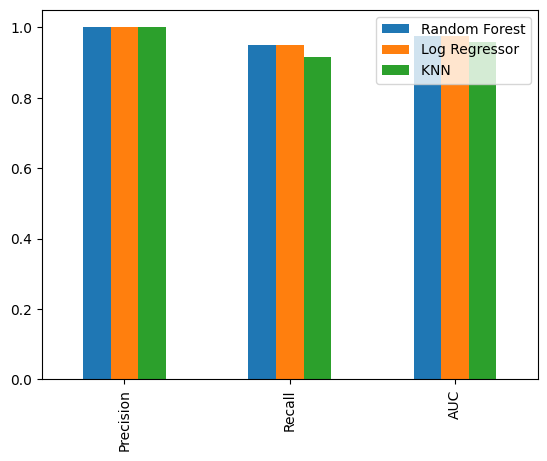

In [ ]:
#plotting the results
pd.DataFrame(rl_metrics).plot(kind="bar")

> We can see that the models perform better on real data which is expected because the synthetic data was generated by another model whilst the real data is based on real life.

**Note** : we can try to implement a new approach when we combine the two data sets to see if it will improve the model's performance.

### 6.3. Modelling with both datasets in one go

In [ ]:
#joining the datasets
merged_data=pd.concat([syn_data,rl_data],axis=0)
len(merged_data), len(rl_data),len(syn_data)

(146429, 10000, 136429)

In [ ]:
#splitting the merged data into X and y
X_merged=merged_data.drop("Machine failure",axis=1)
y_merged=merged_data["Machine failure"]

In [ ]:
#scaling the merged data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_merged=pd.DataFrame(scaler.fit(X_merged).transform(X_merged),columns=X_merged.columns)
X_merged.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.576087,0.481481,0.249127,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.793478,0.790123,0.344005,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.434783,0.345679,0.370780,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.619565,0.641975,0.207218,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.293478,0.407407,0.275320,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#splitting the data into training and validation
X_mg_train,X_mg_valid,y_mg_train,y_mg_valid=train_test_split(X_merged,y_merged,test_size=0.2)

> Now let's model!

In [ ]:
#instanciating the models
rf_mg_clf=RandomForestClassifier()
log_mg_clf=LogisticRegression()
knn_mg_clf=KNeighborsClassifier()

In [ ]:
#fitting the models
fit_models([rf_mg_clf,log_mg_clf,knn_mg_clf],X_mg_train,y_mg_train)

In [ ]:
#evaluating the models
mg_models={"Random Forest" :rf_mg_clf,
           "Logistic Regressor" : log_mg_clf,
           "KNN" : knn_mg_clf}
mg_metrics=evaluate_models(mg_models,X_mg_valid,y_mg_valid)
mg_metrics

{'Random Forest': {'Precision': 0.9704433497536946,
  'Recall': 0.795959595959596,
  'AUC': 0.8977713995219466},
 'Logistic Regressor': {'Precision': 1.0,
  'Recall': 0.7878787878787878,
  'AUC': 0.8939393939393939},
 'KNN': {'Precision': 0.9923273657289002,
  'Recall': 0.7838383838383839,
  'AUC': 0.8918670923047293}}

<Axes: >

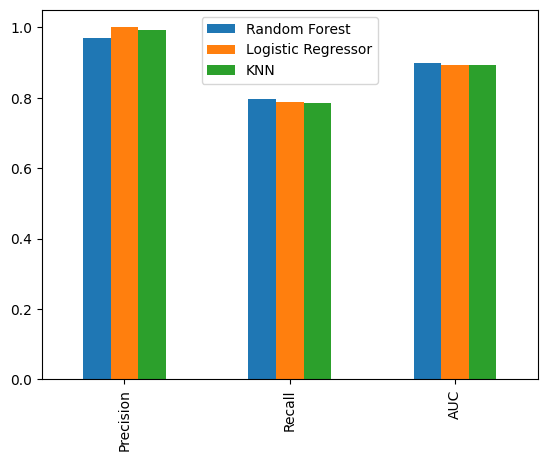

In [ ]:
#plotting the performances
pd.DataFrame(mg_metrics).plot(kind="barh")

> As we can see, adding the real data really boosted our models' performances. So as for the hyperparameter tuning we will focus on using the models trained with the merged data

## 7. Hyperparameter tuning

As noticed in the bar chart above, the models are relatively close, but we can notice that the log regressor and the rf classifier are both ahead of the knn classifier, so we'll focus primarily on the two models for time optimization.

### 7.1 Using RandomizedSearchCV

In [ ]:
#making the param grids for the models
rs_rf_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}

rs_log_grid={"penalty": ["l2","l1"],
          "solver" : ['liblinear'],
          "max_iter" : [1000,2000,3000],
          "C" :np.logspace(-4, 4, 20)}

#### 7.1.1. Log regression model

In [ ]:
#initializing the log regressor to be tuned
log_clf=LogisticRegression()
#tuning the log regressor
from sklearn.model_selection import RandomizedSearchCV
rs_log_model=RandomizedSearchCV(log_clf,n_iter=20,cv=5,verbose=1,param_distributions=rs_log_grid,n_jobs=-1,random_state=34,refit=True)
rs_log_model.fit(X_mg_train,y_mg_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 2000, 3000],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['liblinear']},
                   random_state=34, verbose=1)

In [ ]:
rs_log_model.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 2000,
 'C': 29.763514416313132}

####7.1.2. Random Forest model

In [ ]:
#initialiting the rf baseline
rf_clf=RandomForestClassifier()
#tuning the model
rs_rf_model=RandomizedSearchCV(rf_clf,cv=5,verbose=2,n_iter=20,param_distributions=rs_rf_grid,n_jobs=-1,refit=True,random_state=34)
rs_rf_model.fit(X_mg_train,y_mg_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600]},
                   random_state=34, verbose=2)

In [ ]:
rs_rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

Now let's evaluate the best estimator of both RandomizedSearchCVs

In [ ]:
evaluate_models({"Log Regression classifier" : rs_log_model.best_estimator_,
                 "RF classifier" : rs_rf_model.best_estimator_},X_mg_valid,y_mg_valid,auc=False)

{'Log Regression classifier': {'Precision': 1.0, 'Recall': 0.7898989898989899},
 'RF classifier': {'Precision': 0.9974489795918368,
  'Recall': 0.7898989898989899}}

<Axes: >

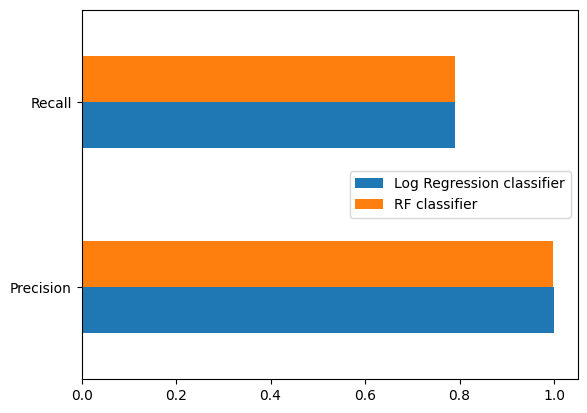

In [ ]:
#evaluate the models
pd.DataFrame(evaluate_models({"Log Regression classifier" : rs_log_model.best_estimator_,
                 "RF classifier" : rs_rf_model.best_estimator_},X_mg_valid,y_mg_valid,auc=False)).plot(kind="barh")

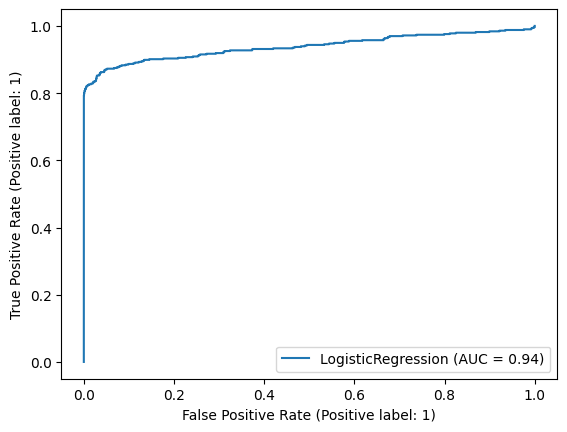

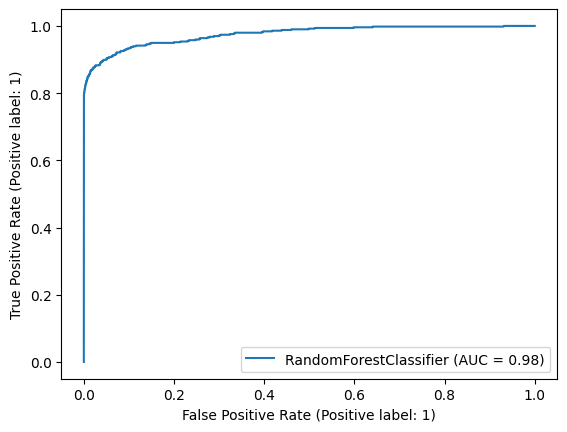

In [ ]:
#ROC CURVE of both models
from sklearn.metrics import RocCurveDisplay
fig,(ax1,ax2)=plt.subplots(figsize=(10,10),ncols=2,nrows=1)
ax1=RocCurveDisplay.from_estimator(rs_log_model.best_estimator_,X_mg_valid,y_mg_valid)
ax2=RocCurveDisplay.from_estimator(rs_rf_model.best_estimator_,X_mg_valid,y_mg_valid)

> As seen in the comparison, we can see the the logistic regressor is performing better on terms of precision, but the random forest is performing better on terms of AUC score, knowing that our primarily evaluation metric is AUC score, we'll continue with the RandomizedSearchCV's best Random Forest Classifier

### 7.2. Training the chosen model on the full dataset

In [ ]:
#model's best params
rs_rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
#instanciating the model
chosen_clf=RandomForestClassifier(n_jobs=-1,n_estimators=200,min_samples_split=10,min_samples_leaf=4,max_features="sqrt",max_depth=None,bootstrap=True,random_state=34)

In [ ]:
#training the model on the full data
chosen_clf.fit(X_merged,y_merged)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=34)

## 8. Making predictions

In [ ]:
#importing the test data
test_data=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/Synthetic Data/test.csv")
test_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
#preprocessing the test data

#1. encoding the categorical variables
test_data=encoding_cat_variables(test_data,"Type")
#2. dropping unnecessary columns
test_data=drop_columns(test_data,["id","Product ID","Type"])
#3. scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test_data=pd.DataFrame(scaler.fit(test_data).transform(test_data),columns=test_data.columns)

In [ ]:
test_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.769231,0.716049,0.192666,0.469780,0.237154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.703297,0.654321,0.317229,0.343407,0.067194,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.659341,0.580247,0.207800,0.465659,0.379447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.527473,0.481481,0.181024,0.601648,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.890110,0.814815,0.201979,0.515110,0.450593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
len(test_data)

90954

In [ ]:
#making predictions
test_preds_proba=chosen_clf.predict_proba(test_data)

In [ ]:
test_preds_proba[:10]

array([[9.99834777e-01, 1.65222535e-04],
       [9.97638757e-01, 2.36124325e-03],
       [9.99985218e-01, 1.47823120e-05],
       [9.98616032e-01, 1.38396838e-03],
       [9.99767012e-01, 2.32988083e-04],
       [9.99215295e-01, 7.84704656e-04],
       [9.89785098e-01, 1.02149016e-02],
       [9.86358619e-01, 1.36413808e-02],
       [9.99850802e-01, 1.49198013e-04],
       [9.99981346e-01, 1.86539906e-05]])

In [ ]:
#getting the prediction in kaggle format
kaggle_sub=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/Synthetic Data/sample_submission.csv")
kaggle_sub.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [ ]:
ids=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/Synthetic Data/test.csv")["id"],columns=["id"])
machine_failure=pd.DataFrame(test_preds_proba.T[1],columns=["Machine failure"])
KS_AE_MF=pd.concat([ids,machine_failure],axis=1)

In [ ]:
KS_AE_MF.head()

,id,Machine failure
0,136429,0.000165
1,136430,0.002361
2,136431,0.000015
3,136432,0.001384
4,136433,0.000233


In [ ]:
#saving the df in a csv file
KS_AE_MF.to_csv("/content/drive/MyDrive/Machine Failure Classification/anass_el-mansouri_kaggle_submission_for_mf.csv",index=False)

#Round 2 : Modelling with XGBoost & CatBoost

##6. Modelling with XGBoost

Since in the first experiment we saw that the merged data worked better for our model, we'll focus on it on this section as well.

In [ ]:
X_merged.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'],
      dtype='object')

In [ ]:
#changing the feature names
alt_X_merged=pd.DataFrame(np.array(X_merged),columns=['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool wear', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'])
alt_X_merged.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.576087,0.481481,0.249127,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.793478,0.790123,0.344005,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.434783,0.345679,0.370780,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.619565,0.641975,0.207218,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.293478,0.407407,0.275320,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
alt_y_merged=pd.DataFrame(np.array(y_merged),columns=["target"])
alt_y_merged.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
#splitting the altered data into train and valid
np.random.seed(42)
alt_X_mg_train,alt_X_mg_valid,alt_y_mg_train,alt_y_mg_valid=train_test_split(alt_X_merged,alt_y_merged)

In [ ]:
from xgboost import XGBClassifier
#instanciating the model
xgb_clf=XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
#fitting the model
xgb_clf.fit(alt_X_mg_train,alt_y_mg_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

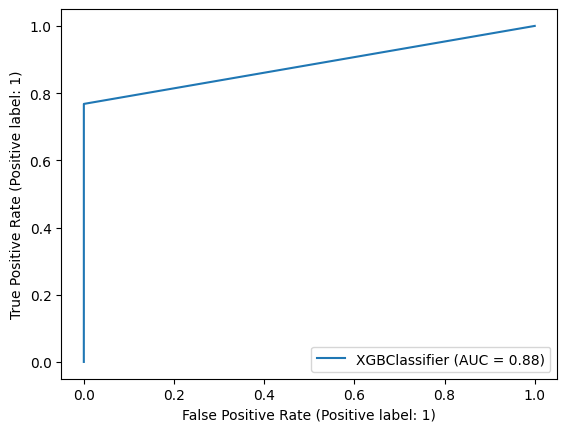

In [ ]:
RocCurveDisplay.from_estimator(xgb_clf,alt_X_mg_valid,alt_y_mg_valid);

> Still needs improvements

##7. Hyperparameter tuning the XGBoost Classifier



In [ ]:
xgboost_grid={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
rs_xgb_clf=RandomizedSearchCV(xgb_clf,n_iter=324,param_distributions=xgboost_grid,n_jobs=-1,cv=5,refit=True,random_state=34,verbose=2)
rs_xgb_clf.fit(alt_X_mg_train,alt_y_mg_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=2, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=324, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=34, verbose=2)

In [ ]:
rs_xgb_clf.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

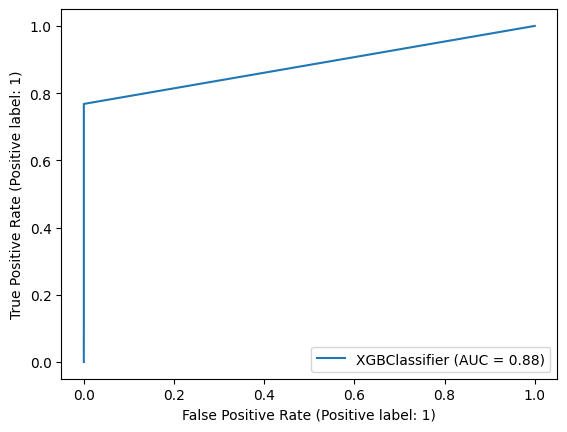

In [ ]:
RocCurveDisplay.from_estimator(rs_xgb_clf.best_estimator_,alt_X_mg_valid,alt_y_mg_valid)

## Modelling with CatBoost

In [ ]:
from catboost import CatBoostClassifier
#instanciating the model
cb_clf=CatBoostClassifier()
#fitting the model
cb_clf.fit(alt_X_mg_train,alt_y_mg_train)

Learning rate set to 0.076614
0:	learn: 0.5180462	total: 203ms	remaining: 3m 22s
1:	learn: 0.3716966	total: 307ms	remaining: 2m 33s
2:	learn: 0.2786187	total: 432ms	remaining: 2m 23s
3:	learn: 0.2070410	total: 535ms	remaining: 2m 13s
4:	learn: 0.1555510	total: 646ms	remaining: 2m 8s
5:	learn: 0.1197121	total: 761ms	remaining: 2m 6s
6:	learn: 0.0946853	total: 878ms	remaining: 2m 4s
7:	learn: 0.0764940	total: 1.01s	remaining: 2m 4s
8:	learn: 0.0634718	total: 1.1s	remaining: 2m 1s
9:	learn: 0.0534809	total: 1.22s	remaining: 2m
10:	learn: 0.0462565	total: 1.36s	remaining: 2m 2s
11:	learn: 0.0409594	total: 1.43s	remaining: 1m 57s
12:	learn: 0.0369644	total: 1.5s	remaining: 1m 53s
13:	learn: 0.0338100	total: 1.6s	remaining: 1m 52s
14:	learn: 0.0313837	total: 1.7s	remaining: 1m 51s
15:	learn: 0.0294071	total: 1.82s	remaining: 1m 52s
16:	learn: 0.0278946	total: 1.85s	remaining: 1m 47s
17:	learn: 0.0265664	total: 1.94s	remaining: 1m 45s
18:	learn: 0.0255237	total: 2.02s	remaining: 1m 44s
19:	le

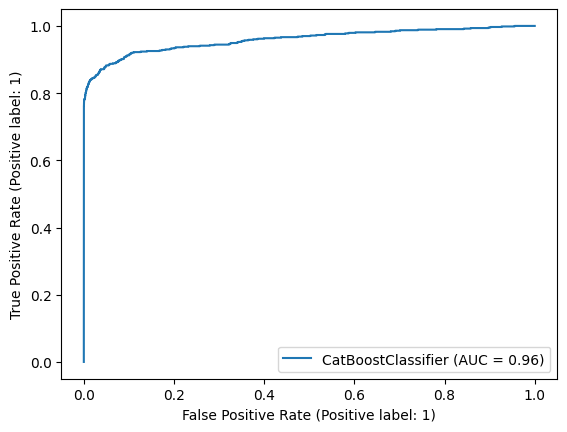

In [ ]:
#checking the performance
RocCurveDisplay.from_estimator(cb_clf,alt_X_mg_valid,alt_y_mg_valid)

> Great results, the cat boost classifier is far better than the XGBoost on terms of AUC score, but still not greater than the Random Forest. let's now do some hyperparameter tuning.

## Hyperparameter tuning the CatBoost Classifier

In [ ]:
#parameters for catboost
cat_grid={'depth' : [4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
          }
#instanciating a catboost classifier
cat_clf=CatBoostClassifier()
#setting the RsCV
rs_cat_clf=RandomizedSearchCV(cat_clf,n_iter=280,cv=5,verbose=2,refit=True,random_state=34,param_distributions=cat_grid,n_jobs=-1)
#fitting the model
rs_cat_clf.fit(alt_X_mg_train,alt_y_mg_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
0:	learn: 0.6549496	total: 24.6ms	remaining: 712ms
1:	learn: 0.6199866	total: 39.1ms	remaining: 547ms
2:	learn: 0.5872628	total: 63.4ms	remaining: 571ms
3:	learn: 0.5568496	total: 83.6ms	remaining: 544ms
4:	learn: 0.5284456	total: 105ms	remaining: 523ms
5:	learn: 0.5022288	total: 125ms	remaining: 501ms
6:	learn: 0.4774211	total: 139ms	remaining: 457ms
7:	learn: 0.4542523	total: 156ms	remaining: 428ms
8:	learn: 0.4325570	total: 181ms	remaining: 423ms
9:	learn: 0.4121844	total: 193ms	remaining: 385ms
10:	learn: 0.3929438	total: 204ms	remaining: 352ms
11:	learn: 0.3752107	total: 216ms	remaining: 324ms
12:	learn: 0.3581796	total: 232ms	remaining: 304ms
13:	learn: 0.3418488	total: 244ms	remaining: 279ms
14:	learn: 0.3266140	total: 256ms	remaining: 256ms
15:	learn: 0.3120336	total: 267ms	remaining: 234ms
16:	learn: 0.2982324	total: 282ms	remaining: 216ms
17:	learn: 0.2853887	total: 298ms	remaining: 199ms
18:	learn: 0.2732283	tot

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f68a0951d20>,
                   n_iter=280, n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   random_state=34, verbose=2)

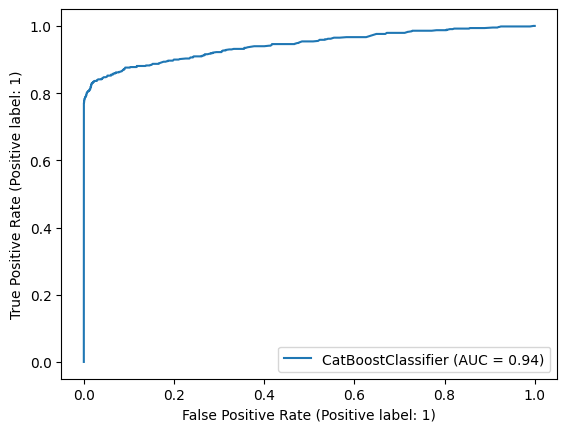

In [ ]:
#evaluate the catboost classifier
RocCurveDisplay.from_estimator(rs_cat_clf.best_estimator_,alt_X_mg_valid,alt_y_mg_valid)

> the catboost classifier is better on default parameters, so we'll continue with the baseline catboost classifier.

## Training the catboost classifier on the full data

In [ ]:
final_cb_clf=CatBoostClassifier()
final_cb_clf.fit(alt_X_merged,alt_y_merged)

Learning rate set to 0.086628
0:	learn: 0.4975937	total: 29.5ms	remaining: 29.5s
1:	learn: 0.3427451	total: 56.6ms	remaining: 28.3s
2:	learn: 0.2485536	total: 83.1ms	remaining: 27.6s
3:	learn: 0.1797043	total: 108ms	remaining: 26.8s
4:	learn: 0.1334476	total: 135ms	remaining: 26.8s
5:	learn: 0.1011018	total: 161ms	remaining: 26.7s
6:	learn: 0.0793909	total: 198ms	remaining: 28.1s
7:	learn: 0.0643361	total: 225ms	remaining: 27.9s
8:	learn: 0.0536555	total: 269ms	remaining: 29.6s
9:	learn: 0.0457976	total: 297ms	remaining: 29.4s
10:	learn: 0.0404156	total: 326ms	remaining: 29.3s
11:	learn: 0.0359214	total: 353ms	remaining: 29.1s
12:	learn: 0.0328895	total: 381ms	remaining: 28.9s
13:	learn: 0.0306736	total: 413ms	remaining: 29.1s
14:	learn: 0.0289074	total: 439ms	remaining: 28.8s
15:	learn: 0.0273859	total: 467ms	remaining: 28.7s
16:	learn: 0.0261154	total: 496ms	remaining: 28.7s
17:	learn: 0.0253125	total: 528ms	remaining: 28.8s
18:	learn: 0.0244878	total: 556ms	remaining: 28.7s
19:	lear

## Making predictions

In [ ]:
#making changes to the test data
cat_test_data=pd.DataFrame(np.array(test_data),columns=['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool wear', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'])

In [ ]:
cat_test_preds=final_cb_clf.predict_proba(cat_test_data)
cat_test_preds[:10]

array([[9.98422659e-01, 1.57734147e-03],
       [9.97219225e-01, 2.78077488e-03],
       [9.99667643e-01, 3.32356795e-04],
       [9.99039842e-01, 9.60158428e-04],
       [9.98488220e-01, 1.51178036e-03],
       [9.99194739e-01, 8.05260915e-04],
       [9.85678590e-01, 1.43214099e-02],
       [9.98450608e-01, 1.54939240e-03],
       [9.99691982e-01, 3.08017917e-04],
       [9.99817848e-01, 1.82152471e-04]])

In [ ]:
#getting the predictions in kaggle format
kaggle_sub_2=pd.concat([ids,pd.DataFrame(cat_test_preds.T[1],columns=["Machine failure"])],axis=1)
kaggle_sub_2.head()

,id,Machine failure
0,136429,0.001577
1,136430,0.002781
2,136431,0.000332
3,136432,0.000960
4,136433,0.001512


In [ ]:
#saving the csv file
kaggle_sub_2.to_csv("/content/drive/MyDrive/Machine Failure Classification/Anass-el-mansouri-KS-for-MF-2.csv",index=False)

# Round 3 : Adding more data to model with

We're going to try to generate more synthetic data in order to add more data to train our best model with, hoping for better results.

In [ ]:
merged_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [ ]:
gen_data=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/gen_data.csv")
gen_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,297.3,308.5,1602,35.7,130,0,0,0,0,0,0,0,1,0
1,301.8,310.6,1469,44.0,192,0,0,0,0,0,0,0,0,1
2,297.2,308.6,1496,36.2,150,0,0,0,0,0,0,0,1,0
3,297.4,308.1,1597,38.8,142,0,0,0,0,0,0,0,0,1
4,299.7,309.5,1392,50.9,147,0,0,0,0,0,0,0,1,0


In [ ]:
gen_data_2=pd.read_csv("/content/drive/MyDrive/Machine Failure Classification/gen_data_2.csv")
gen_data_2.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,302.0,310.8,1660,31.4,34,0,0,0,0,0,0,0,0,1
1,299.7,309.9,1534,37.9,198,0,0,0,0,0,0,0,1,0
2,299.6,310.0,1659,29.7,106,0,0,0,0,0,0,0,1,0
3,301.0,310.5,1413,45.7,179,0,0,0,0,0,0,0,1,0
4,298.7,310.1,1350,41.8,74,0,0,0,0,0,0,0,1,0


In [ ]:
#merging the two datasets
full_data=pd.concat([merged_data,gen_data,gen_data_2],axis=0)
len(full_data)

439287

In [ ]:
#splitting the data
X_full=full_data.drop("Machine failure",axis=1)
y_full=full_data["Machine failure"]

In [ ]:
{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
#let's train the best random forest model on the full data
from sklearn.ensemble import RandomForestClassifier
new_model=RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=4,max_features="sqrt",max_depth=None,bootstrap=True)

In [ ]:
#split data into train and val
from sklearn.model_selection import train_test_split
X_full_train,X_full_valid,y_full_train,y_full_valid=train_test_split(X_full,y_full)

In [ ]:
#fit the model
new_model.fit(X_full_train,y_full_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

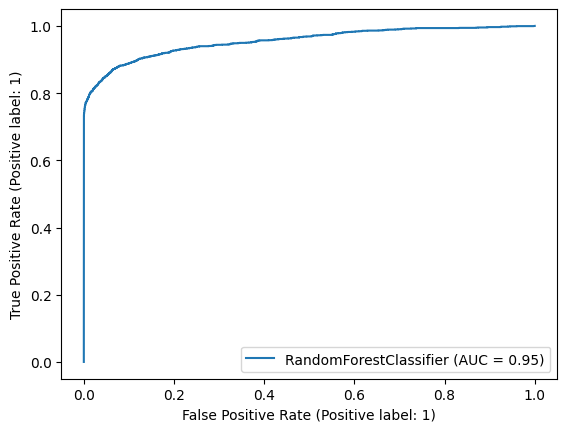

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(new_model,X_full_valid,y_full_valid)

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_full_train,y_full_train)

Learning rate set to 0.122473
0:	learn: 0.4270266	total: 338ms	remaining: 5m 37s
1:	learn: 0.2580190	total: 569ms	remaining: 4m 44s
2:	learn: 0.1636507	total: 799ms	remaining: 4m 25s
3:	learn: 0.1106812	total: 1.13s	remaining: 4m 42s
4:	learn: 0.0800219	total: 1.42s	remaining: 4m 41s
5:	learn: 0.0628656	total: 1.65s	remaining: 4m 33s
6:	learn: 0.0513544	total: 1.86s	remaining: 4m 23s
7:	learn: 0.0433011	total: 2.02s	remaining: 4m 10s
8:	learn: 0.0383037	total: 2.17s	remaining: 3m 58s
9:	learn: 0.0349679	total: 2.33s	remaining: 3m 50s
10:	learn: 0.0326081	total: 2.48s	remaining: 3m 42s
11:	learn: 0.0307200	total: 2.55s	remaining: 3m 30s
12:	learn: 0.0294713	total: 2.67s	remaining: 3m 22s
13:	learn: 0.0285643	total: 2.8s	remaining: 3m 17s
14:	learn: 0.0278676	total: 2.99s	remaining: 3m 16s
15:	learn: 0.0273176	total: 3.06s	remaining: 3m 8s
16:	learn: 0.0268687	total: 3.12s	remaining: 3m
17:	learn: 0.0264955	total: 3.22s	remaining: 2m 55s
18:	learn: 0.0261994	total: 3.33s	remaining: 2m 51

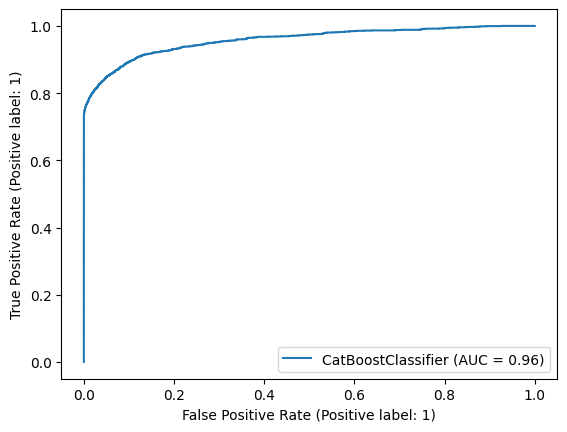

In [ ]:
RocCurveDisplay.from_estimator(cat,X_full_valid,y_full_valid)

In [ ]:
ids.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [ ]:
preds_cat=cat.predict_proba(test_data)
preds_cat[:10]

array([[9.99986659e-01, 1.33405130e-05],
       [9.99986659e-01, 1.33405130e-05],
       [9.99986659e-01, 1.33405130e-05],
       [9.99996416e-01, 3.58440952e-06],
       [9.99996416e-01, 3.58440952e-06],
       [9.99982927e-01, 1.70725030e-05],
       [9.99982927e-01, 1.70725030e-05],
       [9.99986659e-01, 1.33405130e-05],
       [9.99993341e-01, 6.65870146e-06],
       [9.99986659e-01, 1.33405130e-05]])

In [ ]:
#preds
kaggle_sub_4=pd.concat([ids,pd.DataFrame(preds_cat.T[1],columns=["Machine failure"])],axis=1)

In [ ]:
kaggle_sub_4.to_csv("/content/drive/MyDrive/Machine Failure Classification/ks4.csv",index=False)

In [ ]:
new_model.fit(X_full,y_full)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [ ]:
preds_rf=new_model.predict_proba(test_data)
kaggle_sub_6=pd.concat([ids,pd.DataFrame(preds_rf.T[1],columns=["Machine failure"])],axis=1)
kaggle_sub_6.to_csv("/content/drive/MyDrive/Machine Failure Classification/ks6.csv",index=False)

# Round 4 : Trying PCA

In [ ]:
#splitting into train and valid
from sklearn.model_selection import train_test_split
X_pca_train,X_pca_valid,y_pca_train,y_pca_valid=train_test_split(X_merged,y_merged)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_pca_train=scaler.fit_transform(X_pca_train)
X_pca_valid=scaler.transform(X_pca_valid)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca_train=pca.fit_transform(X_pca_train)
X_pca_valid=pca.transform(X_pca_valid)

In [ ]:
#training the random forest with the new reduced data
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=4,max_features="sqrt",max_depth=None,bootstrap=True)

In [ ]:
model_2.fit(X_pca_train,y_pca_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

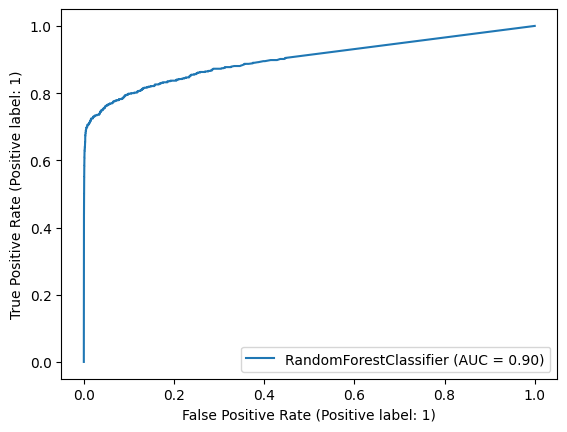

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_2,X_pca_valid,y_pca_valid)

In [ ]:
#catboost
from catboost import CatBoostClassifier
cat_2=CatBoostClassifier()
cat_2.fit(X_pca_train,y_pca_train)

Learning rate set to 0.076614
0:	learn: 0.5374196	total: 156ms	remaining: 2m 36s
1:	learn: 0.4206106	total: 254ms	remaining: 2m 6s
2:	learn: 0.3331058	total: 325ms	remaining: 1m 48s
3:	learn: 0.2670104	total: 386ms	remaining: 1m 36s
4:	learn: 0.2185476	total: 467ms	remaining: 1m 32s
5:	learn: 0.1832437	total: 517ms	remaining: 1m 25s
6:	learn: 0.1570327	total: 568ms	remaining: 1m 20s
7:	learn: 0.1372498	total: 699ms	remaining: 1m 26s
8:	learn: 0.1214931	total: 799ms	remaining: 1m 28s
9:	learn: 0.1096271	total: 864ms	remaining: 1m 25s
10:	learn: 0.0999579	total: 958ms	remaining: 1m 26s
11:	learn: 0.0921774	total: 1.04s	remaining: 1m 25s
12:	learn: 0.0865639	total: 1.2s	remaining: 1m 31s
13:	learn: 0.0816339	total: 1.29s	remaining: 1m 31s
14:	learn: 0.0776644	total: 1.38s	remaining: 1m 30s
15:	learn: 0.0745115	total: 1.48s	remaining: 1m 31s
16:	learn: 0.0718728	total: 1.55s	remaining: 1m 29s
17:	learn: 0.0696962	total: 1.6s	remaining: 1m 27s
18:	learn: 0.0679141	total: 1.68s	remaining: 1m

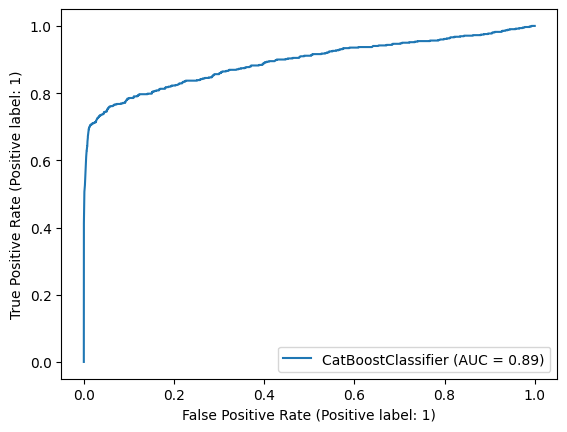

In [ ]:
RocCurveDisplay.from_estimator(cat_2,X_pca_valid,y_pca_valid)

> Doesn't work